In [7]:
!git clone 'https://github.com/shilpiprd/ERA-Solution.git'

Cloning into 'ERA-Solution'...


remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (123/123), done.
error: 5389 bytes of body are still expected | 1.50 MiB/s   
fetch-pack: unexpected disconnect while reading sideband packet
fatal: early EOF
fatal: fetch-pack: invalid index-pack output


In [8]:
%cd ERA-Solution/Sess11\ Solution/

[Errno 2] No such file or directory: 'ERA-Solution/Sess11 Solution/'
/home/shilpi_fire/Documents/OnlineCourses/ERA/ERA/Sess11 Solution


In [9]:
!ls

data	       main.py	   my_utils.py	     run.ipynb
his_S11.ipynb  models	   __pycache__	     utils.py
his_utils.py   my_main.py  pytorch_grad_cam


In [10]:
# from transforms import albu_transform, test_transforms
# from train import train, test
# from mdoel import CustomResNet
from models.resnet import ResNet18
# from dataloader import train_loader, test_loader
import torch

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? False


In [11]:
!pip install torch_lr_finder

In [12]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18()
model = model.to(device)
summary(model, input_size=(3, 32, 32))

cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 

In [13]:
# !pip install pytorch-gradcam

In [14]:
from my_main import train, test
EPOCHS = 2 #just for now
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_acc, train_loss = train(model = model)
    test_acc, test_loss, misclassified = test()

 51%|█████     | 87293952/170498071 [54:29<7:06:10, 3253.92it/s] 

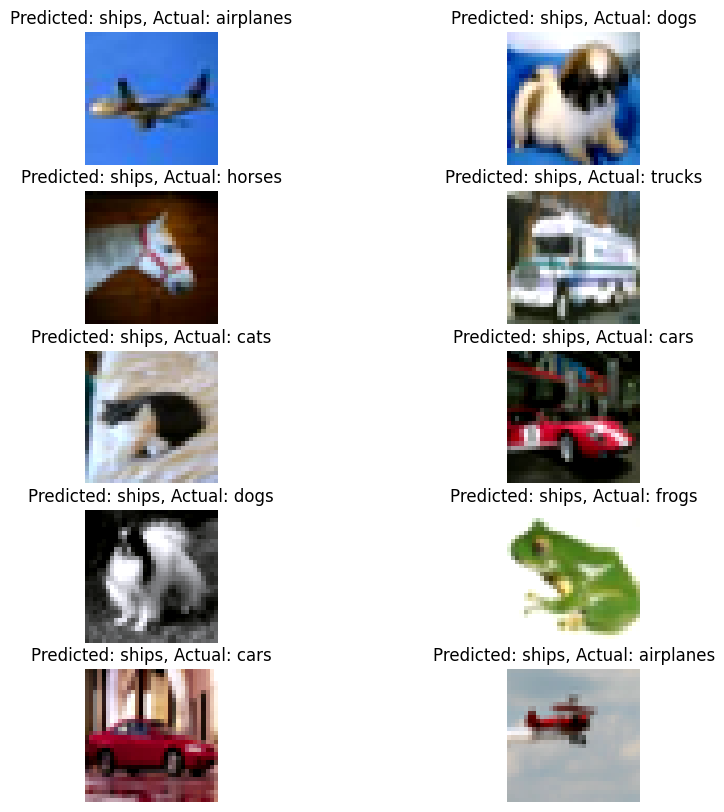

In [ ]:
from my_utils import visualize_misclassified_images
visualize_misclassified_images(misclassified)

In [ ]:
# idx = tensor([ 2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
#         21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 37, 39, 40, 41,
#         42, 43, 45, 46, 47, 49, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])
# target = tensor([8, 8, 0, 5, 7, 9, 8, 3, 1, 5, 6, 1, 0, 5, 7, 7, 1, 7, 2, 9, 3, 3, 3, 0,
#         6, 0, 0, 6, 2, 6, 3, 0, 8, 3, 7, 8, 0, 6, 8, 3, 1, 5, 6, 2, 8, 3, 5, 3,
#         8, 6, 8, 9, 8, 2, 3, 2, 9, 0, 1, 2, 7, 4, 4, 4])
# data.shape  torch.Size([64, 3, 32, 32])
# pred.shape  torch.Size([64])


In [ ]:
print('train_loss: ', train_loss)

train_loss:  [tensor(2.4822, grad_fn=<NllLossBackward0>), tensor(2.5432, grad_fn=<NllLossBackward0>), tensor(2.3494, grad_fn=<NllLossBackward0>)]


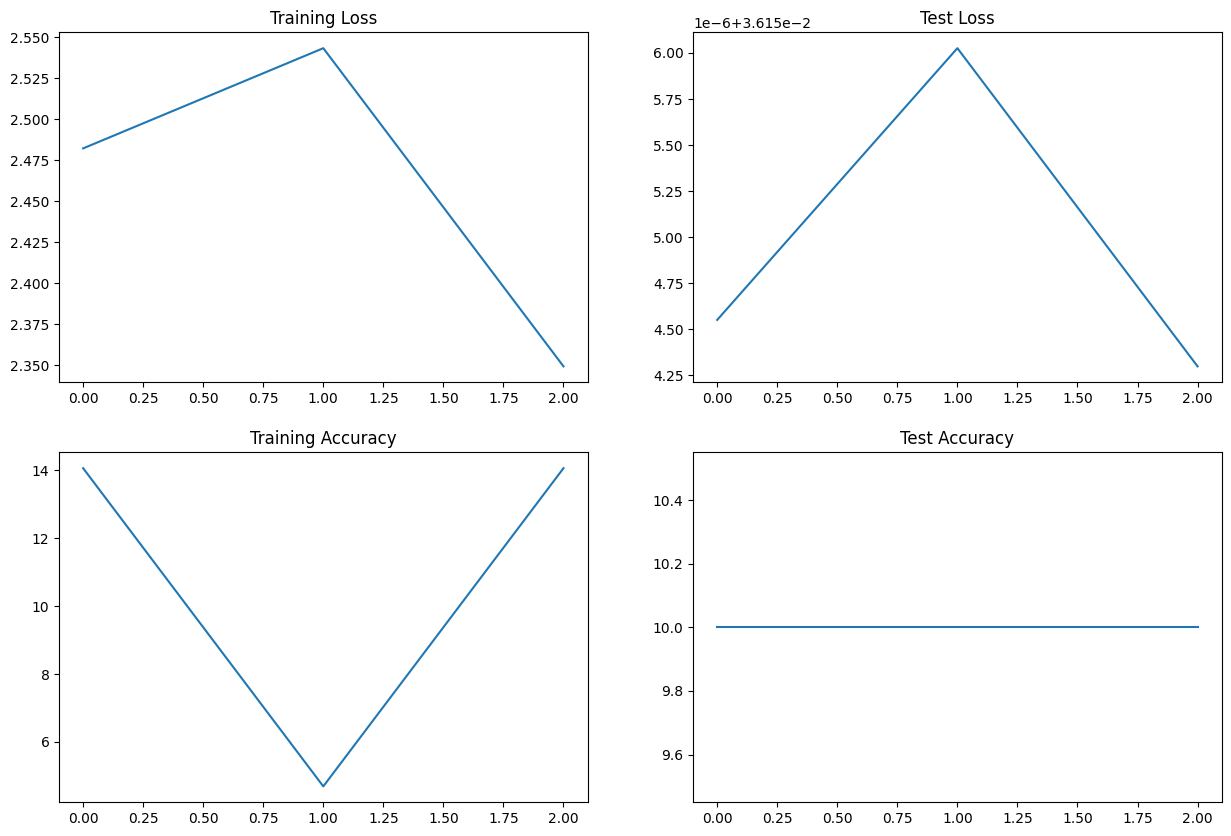

In [ ]:
from my_utils import visualize_loss_accuracy
visualize_loss_accuracy(train_loss,train_acc, test_loss, test_acc) #fixed test_loss thing

In [ ]:
#try to run gradcam on the "misclassified"
len(misclassified)

20

In [ ]:
!pip install ttach

In [ ]:
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
from models.resnet import ResNet18
import matplotlib.pyplot as plt 

model = ResNet18()
model = model.to(device)
# model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]

cam = GradCAM(model=model, target_layers=target_layers)

for img, predicted_label, _ in misclassified:
    # Move image to the same device as model
    img_tensor = img.unsqueeze(0).to(device)
    target = ClassifierOutputTarget(predicted_label)  # Wrap in ClassifierOutputTarget

    # Now pass a list containing the target
    grayscale_cam = cam(input_tensor=img_tensor, targets=[target], aug_smooth=True, eigen_smooth=True)

    # Generate visualization
    visualization = show_cam_on_image(img_tensor.cpu().numpy()[0], grayscale_cam[0], use_rgb=True)

    # Display the visualization
    plt.imshow(visualization)
    plt.show()


Exception: The input image should np.float32 in the range [0, 1]

In [ ]:
#we've misclassified, an array which contains img, predicted label, actual label #implement gradcam on this
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
from models.resnet import ResNet18

model = ResNet18()
model = model.to(device)
# model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]
# input_tensor = # Create an input tensor image for your model..

cam = GradCAM(model=model, target_layers=target_layers)
targets = [misclassified[i][1] for i in range(20)]
for img, predicted_label, _ in misclassified:
    # Move image to the same device as model
    img_tensor = img.unsqueeze(0).to(device)
    # target = predicted_label

# targets = [ClassifierOutputTarget(281)]   
    grayscale_cam = cam(input_tensor=img_tensor, targets=targets, aug_smooth = True, eigen_smooth = True)

# In this example grayscale_cam has only one image in the batch:
# grayscale_cam = grayscale_cam[0, :]
    visualization = show_cam_on_image(img_tensor, grayscale_cam, use_rgb=True)

# You can also get the model outputs without having to re-inference
model_outputs = cam.outputs

TypeError: 'int' object is not callable

# Custom GRADCAM implementation(not ver useful)

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torch.nn import ReLU

In [ ]:
class GradCAM:
    # def __init__(self, model, target_layer):
        # self.model = model
        # self.target_layer = target_layer
        # self.gradients = None

        # # Hook for gradients
        # self.hook_layers()
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_layers()

    def hook_layers(self):
        def forward_hook(module, input, output):
            self.activations = output

        self.target_layer.register_forward_hook(forward_hook)
        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0]

        self.target_layer.register_backward_hook(backward_hook)
    # def hook_layers(self):
    #     def hook_function(module, grad_in, grad_out):
    #         self.gradients = grad_out[0]

    #     self.target_layer.register_backward_hook(hook_function)

    def generate_heatmap(self, input_image, class_idx):
        # Forward
        # model = model.to(device)
        model_output = self.model(input_image)
        # Zero grads
        self.model.zero_grad()
        # Target for backprop
        # one_hot_output = torch.FloatTensor(1, model_output.size()[-1]).zero_()
        # one_hot_output[0][class_idx] = 1

        one_hot_output = torch.zeros_like(model_output, device=device)
        one_hot_output[0][class_idx] = 1
        # model_output.backward(gradient=one_hot_output)

        # Backward pass
        model_output.backward(gradient=one_hot_output)
        # Convert gradients to positive values
        gradients_positive = F.relu(self.gradients)
        # Pooling gradients across channels
        pooled_gradients = torch.mean(gradients_positive, dim=[0, 2, 3])
        # Get the activations
        # activations = self.target_layer.output
        activations = self.activations
        # Weight the channels by corresponding gradients
        for i in range(activations.shape[1]):
            activations[:, i, :, :] *= pooled_gradients[i]
        # Average across channels
        heatmap = torch.mean(activations, dim=1).squeeze()
        heatmap = np.maximum(heatmap.cpu().detach().numpy(), 0)
        # Normalize the heatmap
        heatmap /= np.max(heatmap)
        return heatmap

# def apply_heatmap(heatmap, original_image, alpha=0.6, colormap='viridis'):
#     # Apply heatmap on original image
#     plt.imshow(original_image.permute(1, 2, 0))
#     plt.imshow(heatmap, alpha=alpha, cmap=colormap)
#     plt.colorbar()
#     plt.show()
def apply_heatmap(heatmap, original_image, alpha=0.6, colormap='viridis'):
    # Check if original_image is a tensor and convert it to numpy array
    if isinstance(original_image, torch.Tensor):
        original_image = original_image.cpu().numpy()

    # Convert image to (H, W, C) if it's in (C, H, W) format
    if original_image.shape[0] in [1, 3]:  # Assuming color or grayscale images
        original_image = np.transpose(original_image, (1, 2, 0))

    # Resize heatmap to match the size of the image
    heatmap_resized = np.resize(heatmap, (original_image.shape[0], original_image.shape[1]))

    # Convert heatmap to RGB
    heatmap_rgb = plt.cm.get_cmap(colormap)(heatmap_resized)[:, :, :3]

    # Apply the heatmap to the original image
    combined_image = heatmap_rgb * alpha + original_image * (1 - alpha)

    # Display the image
    plt.imshow(combined_image)
    plt.axis('off')
    plt.show()

# Assuming model is your model, layer is your target layer, and misclassified is your list
model = model.to(device)
grad_cam = GradCAM(model=model, target_layer=model.layer3)

# for img, predicted_label, _ in misclassified:
#     heatmap = grad_cam.generate_heatmap(img.unsqueeze(0), predicted_label)
#     apply_heatmap(heatmap, img)

for img, predicted_label, _ in misclassified:
    # Move image to the same device as model
    img_tensor = img.unsqueeze(0).to(device)
    # Also ensure the predicted_label is a tensor on the correct device
    class_idx = torch.tensor([predicted_label], device=device)
    heatmap = grad_cam.generate_heatmap(img_tensor, class_idx)
    # Move image back to CPU for visualization
    img = img.cpu()
    apply_heatmap(heatmap, img)


In [ ]:
for img, predicted_label, _ in misclassified:
    img_tensor = img.unsqueeze(0).to(device)
    class_idx = torch.tensor([predicted_label], device=device)
    heatmap = grad_cam.generate_heatmap(img_tensor, class_idx)

    # Convert image tensor to numpy for visualization
    np_img = img.cpu().numpy()
    apply_heatmap(heatmap, np_img)


# Literal Implementation

In [1]:
from models.resnet import ResNet18
# from dataloader import train_loader, test_loader
import torch

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

/home/shilpi_fire/colab/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CUDA Available? False


In [2]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18()
model = model.to(device)
summary(model, input_size=(3, 32, 32))

cpu


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [ ]:
#wanna visualize ur data ?
from my_main import visualize_train_data
visualize_train_data()

  1%|          | 1769472/170498071 [05:23<8:34:30, 5465.63it/s] 


KeyboardInterrupt: 

In [3]:
#adding new code
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_lr_finder import LRFinder
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import ReduceLROnPlateau
#importing train_loader from one 
from my_main import train_loader, train, test, classes

criterion = nn.CrossEntropyLoss()
my_optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
lr_finder = LRFinder(model, my_optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # this should give u the lr to feed in OneCyclePolicy

/home/shilpi_fire/colab/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/shilpi_fire/colab/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZNK3c107SymBool10guard_boolEPKcl'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


100%|██████████| 170498071/170498071 [01:19<00:00, 2145673.09it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
from torch.optim.lr_scheduler import OneCycleLR
EPOCHS = 20

my_scheduler = OneCycleLR(
    my_optimizer, #defined above
    max_lr = 3.59E-03 , #u'll get above, 1.12E-01= 81.99%
    steps_per_epoch = len(train_loader),
    epochs = EPOCHS,
    pct_start = 5/EPOCHS,
    div_factor = 100 , #defining min_lr
    three_phase = False, #no Annihilation
    final_div_factor = 100 , #again in support of min_lr
    anneal_strategy = 'linear'
)
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_acc, train_loss = train(model = model, device = device,optimizer=my_optimizer,scheduler = my_scheduler)
    test_acc, test_loss, misclassified = test() #default values are good                              #modified train and test function

In [ ]:
# #implement one cycle lr 
# from my_main import train, test
# EPOCHS = 2 #just for now
# for epoch in range(EPOCHS):
#     print("EPOCH:", epoch)
#     train_acc, train_loss = train(model = model)
#     test_acc, test_loss, misclassified = test()

In [ ]:
from my_utils import visualize_misclassified_images
visualize_misclassified_images(misclassified)

In [ ]:
from my_utils import visualize_loss_accuracy
from torchvision import transforms
import math
visualize_loss_accuracy(train_loss,train_acc, test_loss, test_acc) #fixed test_loss thing

In [ ]:
#attempt to implement gradcam 
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]
input_tensor = # Create an input tensor image for your model..
# Note: input_tensor can be a batch tensor with several images!

cam = GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda)
targets = [ClassifierOutputTarget(281)]

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

In [1]:
#apply gradcam on misclassified images
def display_gradcam_output(data: list,
                           classes: list[str],
                           target_layers, #not specifying default value
                           inv_normalize: transforms.Normalize,
                           model: model,
                        #    target_layers: list['model_layer'],
                           targets=None,
                           number_of_samples: int = 10,
                           transparency: float = 0.60):
    """
    Function to visualize GradCam output on the data
    :param data: List[Tuple(image, label)]
    :param classes: Name of classes in the dataset
    :param inv_normalize: Mean and Standard deviation values of the dataset
    :param model: Model architecture
    :param target_layers: Layers on which GradCam should be executed
    :param targets: Classes to be focused on for GradCam
    :param number_of_samples: Number of images to print
    :param transparency: Weight of Normal image when mixed with activations
    """
    # Plot configuration
    fig = plt.figure(figsize=(10, 10))
    x_count = 5
    y_count = 1 if number_of_samples <= 5 else math.floor(number_of_samples / x_count)

    # Create an object for GradCam
    cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)

    # Iterate over number of specified images
    for i in range(number_of_samples):
        plt.subplot(y_count, x_count, i + 1)
        input_tensor = data[i][0]

        # Get the activations of the layer for the images
        grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
        grayscale_cam = grayscale_cam[0, :]

        # Get back the original image
        img = input_tensor.squeeze(0).to('cpu')
        img = inv_normalize(img)
        rgb_img = np.transpose(img, (1, 2, 0))
        rgb_img = rgb_img.numpy()

        # Mix the activations on the original image
        visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True, image_weight=transparency)

        # Display the images on the plot
        plt.imshow(visualization)
        plt.title(r"Correct: " + classes[data[i][1].item()] + '\n' + 'Output: ' + classes[data[i][2].item()])
        plt.xticks([])
        plt.yticks([])

NameError: name 'transforms' is not defined

In [ ]:
inv_normalize = transforms.Normalize(
    mean=[0.4914, 0.4822, 0.4465],
    std=[0.2023, 0.1994, 0.2010]
)
target_layers = [model.layer4[-1]]
# targets = [ClassifierOutputTarget(7)]
targets = None

display_gradcam_output(misclassified, classes=classes,target_layers=target_layers, inv_normalize=inv_normalize, model= model, targets= targets, number_of_samples=20, transparency=0.70)